# Homework #2

**Due in class on Friday February 1, 2019**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

### Problem A.1


**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors will play an important role for us in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j X_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $X_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable (often assumed to be $N(0, \sigma^2)$). 
5. $\beta_j$ are *unknown parameters* of the model, ($j = 0,...,p$). We hope to estimate these, which would help us characterize the relationship between the predictors and response.

#### (a)  Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. 


$$\mathbf{Y} = X\mathbf{\beta} + \mathbf{\varepsilon},$$ 

where $\mathbf{Y} = (Y_1,...,Y_n)^T$,  $\,\,\,\,X = \begin{bmatrix}
1 & X_{1,1} & X_{1,2} & ... & X_{1,p}\\
1 & X_{2,1} & X_{2,2} & ... & X_{2,p} \\
\vdots & \vdots & \vdots & ... & \vdots \\
1 & X_{n,1} & X_{n,2} & ... & X_{n,p} 
\end{bmatrix}, \,\, $, $\mathbf{\beta} = (\beta_1,...,\beta_n)^T$ and $\mathbf{\varepsilon} = (\varepsilon_1,...,\varepsilon_n)^T$

#### (b) In class, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$. 


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 
2. What does this condition mean in practical terms? 
3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?
4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?




1. For $X^TX$ to be invertible, the columns of $X$ must be linearly independent. That means that no column of $X$--i.e., no measured predictor--can be written as a linear combination of other columns. This implies that $n > (p+1)$.
2. If we've measured a predictor that is simply a linear combination of others, that means that that predictor is not adding any new information that's not already contained in the other predictors. Imagine a simple case: $X_1$ is a predictor of measured weights in pounds, and $X_2$ is a predictor of measured weights in kilograms. Thus, $X_1 = 2.2046 X_2$. Measuring $X_1$ doesn't give any new information.
3. This implies that we have more parameters than data/measurements, and thus $X^TX$ will not be invertible.
4. The formula for $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$ is derived from the "normal equations": $$ (X^TX)\mathbf{\beta} = X^T\mathbf{Y}.$$ The normal equations have a unique solutions if and only if $X^TX$ is invertible. If it's not invertible, then either the normal equations have no solutions or infinitely many solutions.

## B. Computational Problems

### Problem B.1

Let $X_1,...,X_{n_1}$ be an iid sample from population #1, with unknown mean $\mu_1$ and known standard deviation $\sigma_1$, and let $Y_1,...,Y_{n_2}$ be an iid sample from population #2, with unknown mean $\mu_2$ and known standard deviation $\sigma_2$. Suppose we want to conduct a hypothesis test of the sort: $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

The following algorithm has been suggested for a bootstrap test.

1. Calculate the test statistic $$t = \frac{\bar{x} - \bar{y}}{\sqrt{\sigma^2_1\big/n_1 + \sigma^2_2\big/n_2}}$$
 
2. Let $\bar{z}$ be the mean of the combined data sets. Create two new data sets, $x^\prime_1,...,x^\prime_{n_1}$ and $y^\prime_1,...,y^\prime_{n_2}$ that are the original data sets centered at $\bar{z}$.

3. Draw $B$ random bootstrap samples of size $n_1$ from $x^\prime_1,...,x^\prime_{n_1}$ and of size $n_2$ from $y^\prime_1,...,y^\prime_{n_2}$. The result will be two matrices, $x^*$ and $y^*$; $x^*$ will containin columns of bootstrap samples from sample #1, and $y^*$ will contain columns of bootstrap samples from sample #2.

4. Then, for each bootstrap sample pair, calculate 

$$t^* = \frac{\bar{x^*}_j - \bar{y^*}_j}{\sqrt{\sigma^{*^2}_1\big/n_1 + \sigma^{*^2}_2\big/n_2}},$$

where $\bar{x^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #1, and $\bar{y^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #2. $\sigma^{*^2}_1$ and $\sigma^{*^2}_2$ are the corresponding variance estimates of the $j^{th}$ bootstrap sample. $t^*$ will be a vector of length $B$ and will approximate the distribution of the test statistic $t$.

5. Estimate the p-value using $$\frac{\text{# of times }\{t^* \ge t \}}{B}.$$ 



#### (a) Generate $X_1,...,X_{20} \overset{iid}{\sim} N(0,2)$ and $Y_1,...,Y_{15} \overset{iid}{\sim} N(1,3)$, and then forget that you know $\mu_1 = 0$ and $\mu_2 = 1$. Use the bootstrap method described above to test $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

In [6]:
set.seed(878)
n1 = 20; mu1 = 0; sig1 = 2; x = rnorm(n1,mu1,sig1)
n2 = 15; mu2 = 1; sig2 = 3; y = rnorm(n2,mu2,sig2)
t = (mean(x) - mean(y))/(sqrt(sig1^2/n1 + sig2^2/n2)); t

zbar = mean(c(x,y)); xprime = x - mean(x) + zbar; 
yprime = y - mean(y) + zbar

B = 500; 
xstar = replicate(B, sample(xprime,n1,replace = TRUE))
ystar = replicate(B, sample(yprime,n2,replace = TRUE))

tstar = (colMeans(xstar) - colMeans(ystar))/(sqrt(sig1^2/n1 + sig2^2/n2)); 


pvalue = sum(tstar >= t)/B; pvalue

[1] -0.003868083

[1] 0.5

The p-value is greater than $\alpha = 0.05$ so we fail to reject the null hypothesis. 

#### (b) Use t.test() to test the hypotheses in part (a).

In [7]:
t.test(x,y, alternative = "greater")


	Welch Two Sample t-test

data:  x and y
t = -0.0035138, df = 20.896, p-value = 0.5014
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.698092       Inf
sample estimates:
mean of x mean of y 
0.6238552 0.6273149 


#### (c) How much do the answers from (a) and (b) differ? Explain the relationship between these tests.

They don't differ by much. The reason for this is that the "normal theory" holds for the data that we generated, so the bootstrap procedure should give us results close to the t-interval.

### Problem B.2

A tennis club has two systems to measure the speed of a tennis ball. The local tennis pros suspect one system, ${\tt speed1}$, is consistently recording faster speeds. To test her suspicions, she sets up both systems and records the speed of 12 serves (three serves from each side of the court). The values are stored in the data frame ${\tt TENNIS}$, with variables ${\tt speed1}$ and ${\tt speed2}$. The recorded speeds are in kilometers per hour. You can access ${\tt TENNIS}$ by installing the PASWR2 package (if you haven't dont so already: install.packages("PASWR2")) and running:

library(PASWR2)

data(TENNIS)


#### Does the evidence support the tennis pro's suspicion? Use the above bootstrap hypothesis testing procedure and $\alpha = 0.1$. 

In [39]:
library(PASWR2)
data(TENNIS)
with(TENNIS, t.test(speed1, speed2, alternative = "greater"))
x = TENNIS$speed1; n1 = length(x); sig1 = sd(x); 
y = TENNIS$speed2; n2 = length(y); sig2 = sd(y);

t = (mean(x) - mean(y))/(sqrt(sig1^2/n1 + sig2^2/n2)); t

zbar = mean(c(x,y)); xprime = x - mean(x) + zbar; 
yprime = y - mean(y) + zbar

B = 500; 
xstar = replicate(B, sample(xprime,n1,replace = TRUE))
ystar = replicate(B, sample(yprime,n2,replace = TRUE))

tstar = (colMeans(xstar) - colMeans(ystar))/(sqrt(sig1^2/n1 + sig2^2/n2)); 


pvalue = sum(tstar >= t)/B; pvalue


	Welch Two Sample t-test

data:  speed1 and speed2
t = -0.26746, df = 15.83, p-value = 0.6037
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -10.01106       Inf
sample estimates:
mean of x mean of y 
 78.48583  79.81500 


[1] -0.2674647

[1] 0.588

The p-value is high, and thus we don't have good evidence to support the tennis pro's suspicion.

### Problem B.3
Let $X_1,...,X_{30} \overset{iid}{\sim}N(1,9)$. The formula for a 90% confidence interval for $\mu$ is 

$$\bar{X} \pm 1.64\frac{\sigma}{\sqrt{n}}.$$

Let's conduct a simulation to confirm the coverage of this confidence interval.

#### (a) Generate $m = 500$ random samples of size $n = 30$ from $N(1,9)$ and calculate the 90% confidence interval for each. Don't print anything.

In [137]:
set.seed(0019)
n = 30; mu = 1; sig = 3; m = 500; x = replicate(m, rnorm(n,mu,sig))
xbar = colMeans(x); 
ci = cbind(xbar-1.64*3/sqrt(n), xbar+1.64*3/sqrt(n));

#### (b) Estimate the coverage by finding the number of intervals that cover the true mean, and dividing my $m$.

In [138]:
coverage = 1-sum(ci[,1] > mu | ci[,2] < mu)/m
cat("The estimated coverage is",coverage,".")

The estimated coverage is 0.91 .

### Problem B.4

Suppose that $X_1,...,X_8 \overset{iid}{\sim} Exp(\lambda)$. 


#### (a) Compute a $90\%$ pivot confidence interval for the population variance: $Var(X) = 1/\lambda^2 = \theta$.


95%          5% 
-0.04192049  0.31303493

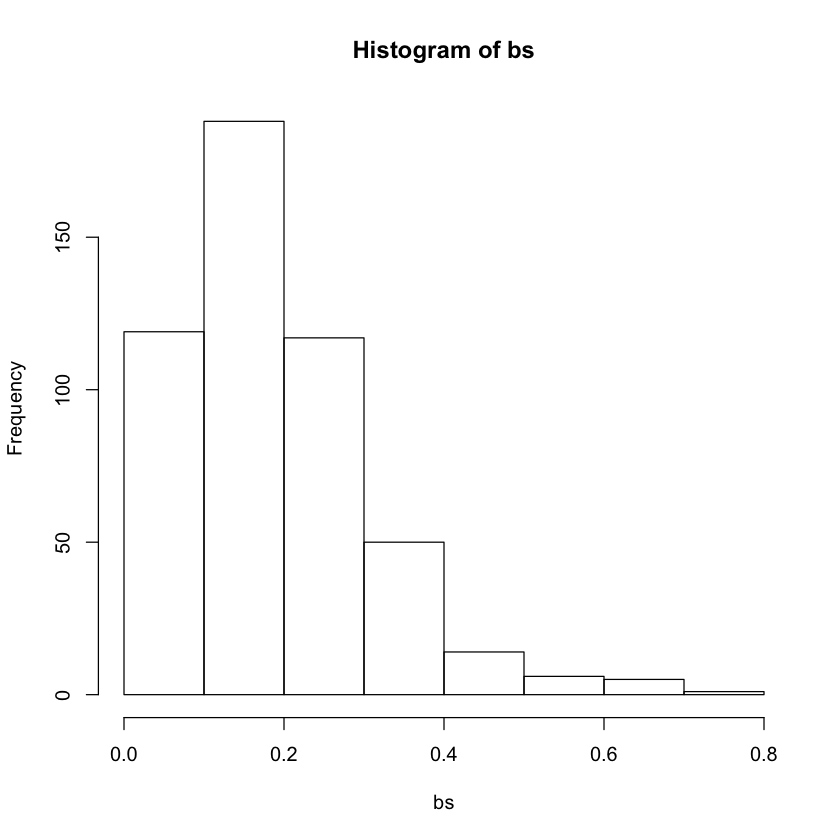

In [44]:
### NOT MODIFIED

B = 500; n = 8; lambda = 3; 
x = rexp(n, lambda); v = 1/lambda^2;
bs = apply(replicate(B,sample(x,n,replace =TRUE)),2, function(x) mean(x)^2)
bounds = quantile(bs, c(0.05, 0.95))
hist(bs)
#bs =replicate(B,apply(replicate(B,sample(x,n,replace =TRUE)),2,var))
count = matrix(NA, ncol = 1, nrow = B)
l = 2*mean(x)^2 - bounds[2]
u = 2*mean(x)^2 - bounds[1]
c(l,u)

In [45]:
v

[1] 0.1111111

#### (b) Investigate the coverage of the bootstrap pivot confidence interval from part (a).

In [50]:
v = 1/lambda^2; v
for (i in 1:500){
    x = rexp(n, lambda); 
    bs = as.numeric(quantile(apply(replicate(B,sample(x,n,replace = TRUE)),2,function(x) mean(x)^2), probs = c(0.025,0.975)))
    l = 2*mean(x)^2 - bs[2]
    u = 2*mean(x)^2 - bs[1]
    #l = bs[1]
    #u = bs[2]
    count[i] = l > v | u < v
    
}


[1] 0.1111111

In [51]:
1-sum(count[1:500])/B

[1] 0.722

### Problem B.5

#### (a) Load the "gala" dataset, and describe the variables. 

In [4]:
library(faraway)
library(ggplot2)
data(gala)
#install.packages("gridExtra")
library(gridExtra)

#plot(gala)

#### (b) Use ggplot() to explore the relationship between the Species variable (response) and Endemics, Elevation, Nearest, and Adjacent (predictor variables). You might do so by creating four separate scatter plots. Do these relationships look linear? Does the variability in Species change as a function of any of the predictors? Are there any outliers in any of the plots?

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Species,1.00000000,0.970876516,0.6178431,0.73848666,-0.014094067,-0.17114244,0.02616635
Endemics,0.97087652,1.000000000,0.6169791,0.79290437,0.005994286,-0.15426432,0.08265803
Area,0.61784307,0.616979087,1.0000000,0.75373492,-0.111103196,-0.10078493,0.18003759
Elevation,0.73848666,0.792904369,0.7537349,1.00000000,-0.011076984,-0.01543829,0.53645782
Nearest,-0.01409407,0.005994286,-0.1111032,-0.01107698,1.000000000,0.61541036,-0.11624788
Scruz,-0.17114244,-0.154264319,-0.1007849,-0.01543829,0.615410357,1.00000000,0.05166066
Adjacent,0.02616635,0.082658026,0.1800376,0.53645782,-0.116247885,0.05166066,1.00000000


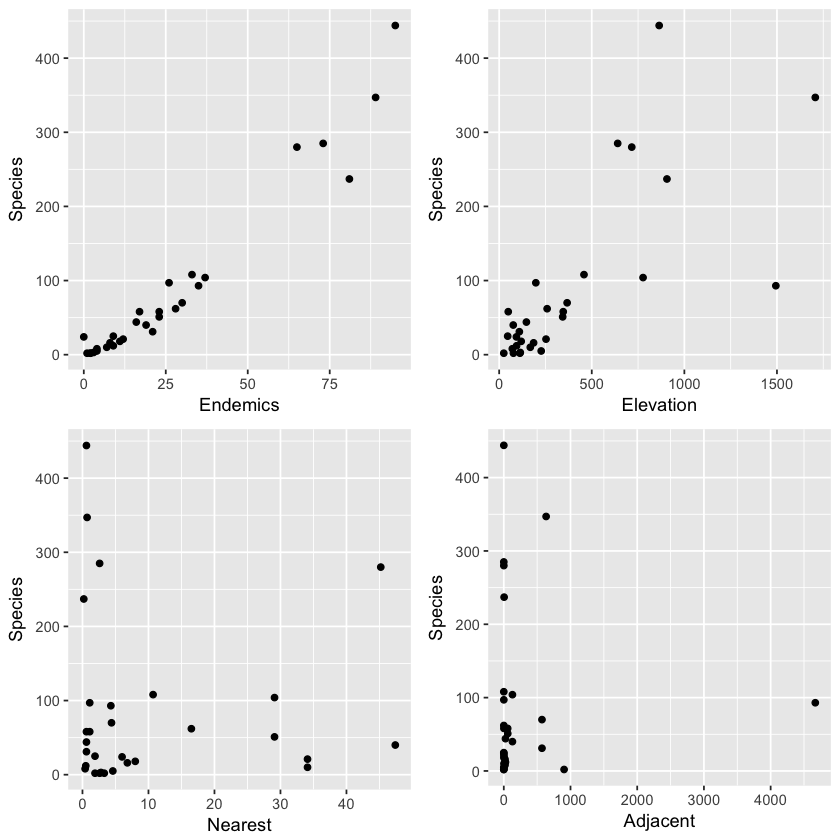

In [6]:
p = ggplot(data = gala) 
p1 = p + geom_point(mapping = aes(x = Endemics, y = Species)) 
p2 = p + geom_point(mapping = aes(x = Elevation, y = Species))
p3 = p + geom_point(mapping = aes(x = Nearest, y = Species))
p4 = p + geom_point(mapping = aes(x = Adjacent, y = Species))
grid.arrange(p1,p2,p3,p4, nrow = 2)
cor(gala)

1. The Species vs Endemics plot appears to be approximately linear, but perhaps with some curvature.
2. The Species vs Elevation plot appears roughly linear, but there appears to be more variance in Species as Elevation gets higher.
3. The Species vs Nearest plot doesn't appear to have a linear relationship.
4. The Species vs Adjacent plot doesn't appear to have a linear relationship, and there seem to be a few very large outliers.